In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
# Reset pseudo random number generator so that the results are reproducible.
seed = 42
np.random.seed(seed)

### Generating the target function and its noisy version.

In [3]:
# Sets the number of examples.
N = 1000000

# Attribute.
x = np.sort(2*np.random.rand(N, 1) - 1, axis=0)

# Target function.
y = 1 + 0.5*x + 2*x**2 + 1.5*x**3 - 3*x**4

# Noise.
w = 0.3*np.random.randn(N, 1)

# Noisy function.
y_noisy = y + w

# Validation samples.
Ntest = 100
x_test = np.linspace(-1, 1, Ntest).reshape(Ntest, 1)
y_test = 1 + 0.5*x_test + 2*x_test**2 + + 1.5*x_test**3 - 3*x_test**4 + 0.3*np.random.randn(Ntest, 1)

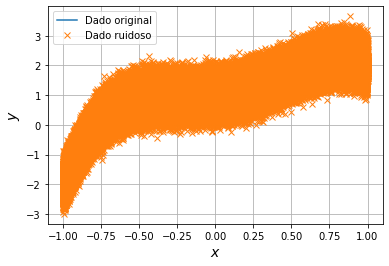

In [4]:
# Plot original data versus noisy version.
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#plt.savefig("target_function.png", dpi=600)

#Show the plot.
plt.show()

### Define the polinomial order

In [5]:
# Polynomial order.
model_order = 4

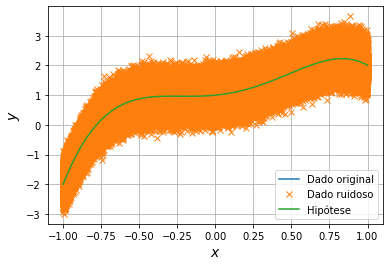

In [6]:
include_bias = True

# Plot original data versus noisy version.
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')

# Instantiate a polynomial with the given degree.
poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
# Instantiate a scaler that will standardize the features.
std_scaler = StandardScaler()
# Instantiate a Ridge regressor.
reg = LinearRegression()
# Create a pipeline of actions.
model = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("reg", reg),
])
# Train model.
model.fit(x, y_noisy)
# Predict.
y_test_regul = model.predict(x_test)
# Plot prediction.
plt.plot(x_test, y_test_regul, label='Hipótese')
    
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
# Save figure
#plt.savefig("ridge_regression.png", dpi=600)

#Show the plot.
plt.show()

In [7]:
model['reg'].intercept_[0]

1.0673418482562007

In [8]:
print('Média das amostras da função observável:', np.mean(y_noisy))

Média das amostras da função observável: 1.0673418482562127


In [9]:
print(np.mean(x))

0.0006689723514294182


In [10]:
print(np.mean(w))

-0.0005859639399014375
